In [1]:
import glob
import pickle
import numpy as np
from matplotlib import pyplot as plt

In [3]:
# !curl -O http://www.cs.toronto.edu/~kriz/cifar-10-python.tar.gz
# !tar -xvf cifar-10-python.tar.gz

(50000, 3, 32, 32) (50000, 1) (10000, 3, 32, 32) (10000, 1)


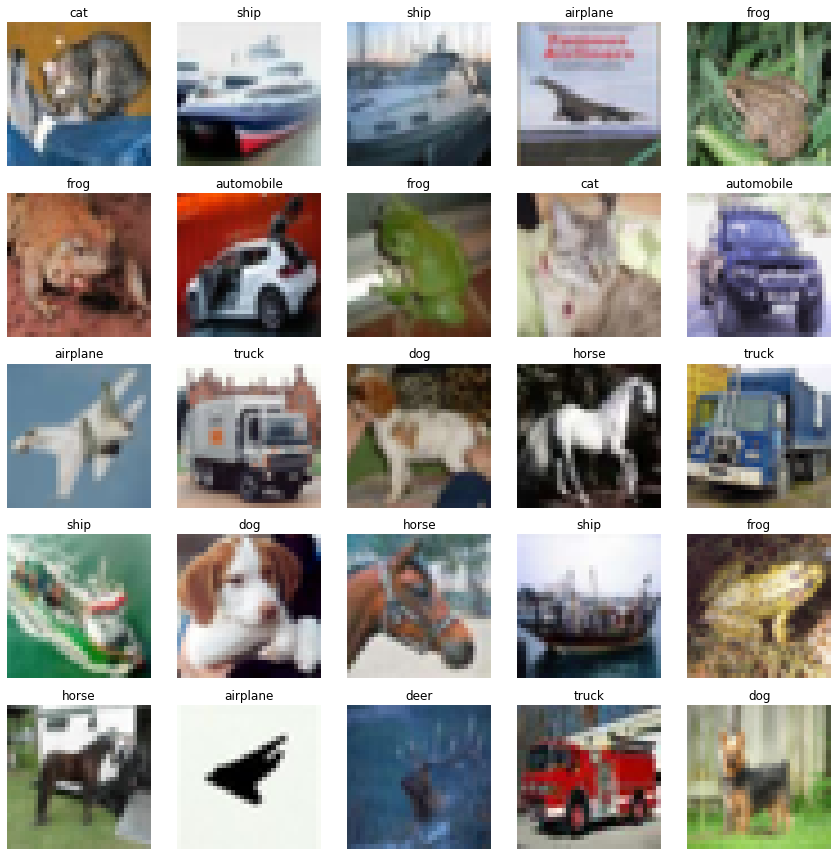

In [2]:
def load(file_name):
    data = []
    
    for file in glob.glob('cifar-10-batches-py/' + file_name):
        with open(file, 'rb') as fo:
            data.append(pickle.load(fo, encoding='bytes'))
            
    images = np.array(data[0][b'data'])
    labels = np.array(data[0][b'labels'])

    if len(data) > 1:
        for i in range(1, len(data)):
            images = np.concatenate((images, data[i][b'data']), axis=0)
            labels = np.concatenate((labels, data[i][b'labels']), axis=0)
    
    return (images.reshape(-1, 3, 32, 32)/255.0).astype(np.float32), labels.reshape((-1, 1))


Xtrain, Ttrain = load('data_batch_*')
Xtest, Ttest, = load('test_batch')

print(Xtrain.shape, Ttrain.shape, Xtest.shape, Ttest.shape)
    
with open('cifar-10-batches-py/batches.meta', 'rb') as f:
    class_names = pickle.load(f, encoding='bytes')
class_names = class_names[b'label_names']
classes = np.unique(Ttrain)
    
def imshow(Xset, Tset):
    plt.figure(figsize=(12, 12))
    for i in range(25):
        plt.subplot(5, 5, i + 1)
        plt.imshow(np.moveaxis(Xset[i,...], 0, 2), interpolation='nearest')
        plt.axis('off')
        unicode = class_names[Tset[i][0]].decode('utf-8')
        plt.title(unicode) 

    plt.tight_layout()
    
imshow(Xtest, Ttest)

In [74]:
ex = Xtrain[np.random.randint(len(Xtrain))]

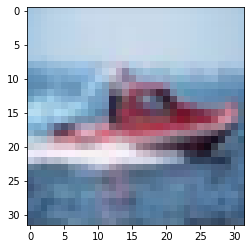

In [75]:
plt.imshow(np.moveaxis(ex, 0, 2))

In [76]:
ex = np.random.poisson(ex * 255) / 255.0

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


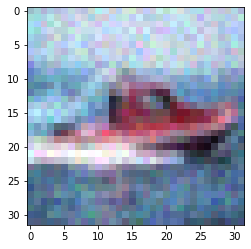

In [77]:
plt.imshow(np.moveaxis(ex, 0, 2))

In [60]:
np.max(ex)
np.random.poisson(255)

260